The problem I would like to solve is to identify key features related to the churning credit card customers. I got the data and the idea from the Kaggle website https://www.kaggle.com/sakshigoyal7/credit-card-customers. 

## Preprocessing

This preprocessing step involves scaling the data and creating dummy variables. I will also apply a baseline algorithm to set the baseline for future models. In particular, I will create a simple prediction algorithm that assumes every customer will not churn as a baseline.

In [1]:
# First thing to do is to import modules
import numpy as np
import pandas as pd

In [2]:
# Loading the data
df = pd.read_csv('Bank.csv')

In [4]:
# Check the data
df.head().T

,0,1,2,3,4
CLIENTNUM,768805383,818770008,713982108,769911858,709106358
Attrition_Flag,0,0,0,0,0
Customer_Age,45,49,51,40,40
Gender,0,1,0,1,0
Dependent_count,3,5,3,4,3
Education_Level,High School,Graduate,Graduate,High School,Uneducated
Marital_Status,Married,Single,Married,Unknown,Married
Income_Category,$60K - $80K,Less than $40K,$80K - $120K,Less than $40K,$60K - $80K
Card_Category,Blue,Blue,Blue,Blue,Blue
Months_on_book,39,44,36,34,21


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  int64  
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  int64  
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

* __Attrition_Flag__ will be our target variable, so I will separate this and store as y.
* __Education_Level, Marital_Status, Income_Category__ and __Card_Category__ are all categorical values so I will have to create dummy variables for these columns.
* __CLIENTNUM__ is just a unique value for each customer so I will drop this column.
* I will be running the standard scaling to scale the remaining data

### 1. dropping columns

I will drop __CLIENTNUM__ column

In [7]:
df.drop(columns=['CLIENTNUM'], inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  int64  
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  int64  
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

### 2. Categorical variables

Create dummy variables for __Education_Level, Marital_Status, Income_Category__ and __Card_Category__

In [11]:
df = pd.get_dummies(df,columns=['Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category'],drop_first=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 33 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Attrition_Flag                  10127 non-null  int64  
 1   Customer_Age                    10127 non-null  int64  
 2   Gender                          10127 non-null  int64  
 3   Dependent_count                 10127 non-null  int64  
 4   Months_on_book                  10127 non-null  int64  
 5   Total_Relationship_Count        10127 non-null  int64  
 6   Months_Inactive_12_mon          10127 non-null  int64  
 7   Contacts_Count_12_mon           10127 non-null  int64  
 8   Credit_Limit                    10127 non-null  float64
 9   Total_Revolving_Bal             10127 non-null  int64  
 10  Avg_Open_To_Buy                 10127 non-null  float64
 11  Total_Amt_Chng_Q4_Q1            10127 non-null  float64
 12  Total_Trans_Amt                 

### 3. Target variable and rest
__Attrition_Flag__ is the target variable

In [14]:
y = df['Attrition_Flag']

In [16]:
X = df.drop(columns=['Attrition_Flag'])

In [18]:
y.shape, X.shape

((10127,), (10127, 32))

### 4. Scaling the data

In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [32]:
X_scaled.shape

(10127, 32)

### 5. Splitting the data

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y,test_size=0.25, random_state=1, stratify=y)

In [37]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(7595, 32) (2532, 32)
(7595,) (2532,)


### 6. Dummy prediction

Here I create a dummy prediction which just assumes every customer is not churning.

In [49]:
y_dum_pred = np.zeros((2532,), dtype=int)

In [50]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_dum_pred))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91      2125
           1       0.00      0.00      0.00       407

    accuracy                           0.84      2532
   macro avg       0.42      0.50      0.46      2532
weighted avg       0.70      0.84      0.77      2532



/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [51]:
from sklearn.metrics import confusion_matrix
pl = confusion_matrix(y_test,y_dum_pred)

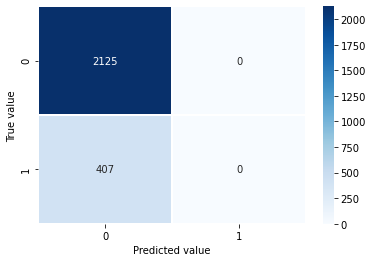

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(pl, annot=True, fmt ='d', cmap='Blues',linewidth=0.5)
plt.xlabel('Predicted value')
plt.ylabel('True value')
plt.show()

If those classification report is correct, I will be using those numbers as baseline.

### 7. Saving data

In [64]:
df.to_csv('preprocessed.csv',index=False)